- **MLflow client allows you to:**
- Create, delete and search for experiments in a workspace
- Start, stop, cancel and query runs for experiments
- Track and retrieve metrics, parameters, artifacts and models from runs

# 1 - Prerequisites

In [1]:
# Ensure you have the dependencies for this notebook
%pip install -r run_history.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 21.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing inst

In [2]:
import mlflow

In [3]:
experiment_name = "heart-classifier-sample"
model_name = "heart-classifier"
artifact_path = "pipeline"

In [4]:
from trainer import train_and_log

In [5]:
mlflow.set_experiment(experiment_name=experiment_name)
input_data = "https://azuremlexampledata.blob.core.windows.net/data/heart-disease-uci/data/heart.csv"

for run_idx in range(3):
    with mlflow.start_run(run_name=f"{experiment_name}-run-{run_idx}"):
        train_and_log(input_data)

2024/05/16 02:21:26 INFO mlflow.tracking.fluent: Experiment with name 'heart-classifier-sample' does not exist. Creating a new experiment.
2024/05/16 02:21:44 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '88b4e219ae9cbd4ebc809cf52a2ce93b', 'request': '2ce4a492b2c8cc6b'}, 'Environment': 'westus', 'Location': 'westus', 'Time': '2024-05-16T02:21:44.4385678+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). 

Accuracy: 79.12%
Accuracy: 80.22%
Accuracy: 81.32%


# 2 - Getting experiments

In [6]:
# get all the active experiments in the workspace using MLFlow

experiments = mlflow.search_experiments()
for exp in experiments:
    print(exp.name)

heart-classifier-sample


In [7]:
# retrieve archived experiments as well

from mlflow.entities import ViewType

experiments = mlflow.search_experiments(view_type=ViewType.ALL)
for exp in experiments:
    print(exp.name)

heart-classifier-sample


In [8]:
# Getting a specific experiment

exp = mlflow.get_experiment_by_name(experiment_name)
print(exp)

<Experiment: artifact_location='', creation_time=1715826087470, experiment_id='0f0b3354-3be9-415e-9d6b-8bb6984f756d', last_update_time=None, lifecycle_stage='active', name='heart-classifier-sample', tags={}>


# 3 - Getting runs inside an experiment

### a) Getting all the runs

In [19]:
# Getting all the runs
mlflow.search_runs(exp.experiment_id)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_delta_step,params.gamma,params.learning_rate,...,params.n_jobs,params.subsample,params.eval_metric,params.maximize,params.max_depth,params.multi_strategy,params.device,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.rootRunId
0,30d28b88-0c88-4ef1-9645-21a018204ebe,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:21:27.765000+00:00,2024-05-16 02:22:00.439000+00:00,0.791209,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-0,Vijay Gadhave,30d28b88-0c88-4ef1-9645-21a018204ebe
1,8110ba89-f1cf-455a-b452-e44f412de4c4,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:00.793000+00:00,2024-05-16 02:22:15.388000+00:00,0.802198,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-1,Vijay Gadhave,8110ba89-f1cf-455a-b452-e44f412de4c4
2,d75741cd-ebc3-40e3-b42f-6e2826b87553,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:15.688000+00:00,2024-05-16 02:22:31.242000+00:00,0.813187,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-2,Vijay Gadhave,d75741cd-ebc3-40e3-b42f-6e2826b87553


### b) Filtering and ordering runs

In [20]:
# ordered descending by start_time
mlflow.search_runs(exp.experiment_id, order_by=["start_time DESC"], max_results=3)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_delta_step,params.gamma,params.learning_rate,...,params.n_jobs,params.subsample,params.eval_metric,params.maximize,params.max_depth,params.multi_strategy,params.device,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.rootRunId
0,d75741cd-ebc3-40e3-b42f-6e2826b87553,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:15.688000+00:00,2024-05-16 02:22:31.242000+00:00,0.813187,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-2,Vijay Gadhave,d75741cd-ebc3-40e3-b42f-6e2826b87553
1,8110ba89-f1cf-455a-b452-e44f412de4c4,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:00.793000+00:00,2024-05-16 02:22:15.388000+00:00,0.802198,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-1,Vijay Gadhave,8110ba89-f1cf-455a-b452-e44f412de4c4
2,30d28b88-0c88-4ef1-9645-21a018204ebe,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:21:27.765000+00:00,2024-05-16 02:22:00.439000+00:00,0.791209,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-0,Vijay Gadhave,30d28b88-0c88-4ef1-9645-21a018204ebe


In [21]:
# ordered ascending by start_time
mlflow.search_runs(exp.experiment_id, order_by=["start_time AESC"], max_results=3)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_delta_step,params.gamma,params.learning_rate,...,params.n_jobs,params.subsample,params.eval_metric,params.maximize,params.max_depth,params.multi_strategy,params.device,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.rootRunId
0,30d28b88-0c88-4ef1-9645-21a018204ebe,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:21:27.765000+00:00,2024-05-16 02:22:00.439000+00:00,0.791209,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-0,Vijay Gadhave,30d28b88-0c88-4ef1-9645-21a018204ebe
1,8110ba89-f1cf-455a-b452-e44f412de4c4,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:00.793000+00:00,2024-05-16 02:22:15.388000+00:00,0.802198,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-1,Vijay Gadhave,8110ba89-f1cf-455a-b452-e44f412de4c4
2,d75741cd-ebc3-40e3-b42f-6e2826b87553,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:15.688000+00:00,2024-05-16 02:22:31.242000+00:00,0.813187,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-2,Vijay Gadhave,d75741cd-ebc3-40e3-b42f-6e2826b87553


In [22]:
# search by metrics to know which run generated the best results:
mlflow.search_runs(exp.experiment_id).sort_values("metrics.accuracy", ascending=False)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_delta_step,params.gamma,params.learning_rate,...,params.n_jobs,params.subsample,params.eval_metric,params.maximize,params.max_depth,params.multi_strategy,params.device,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.rootRunId
2,d75741cd-ebc3-40e3-b42f-6e2826b87553,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:15.688000+00:00,2024-05-16 02:22:31.242000+00:00,0.813187,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-2,Vijay Gadhave,d75741cd-ebc3-40e3-b42f-6e2826b87553
1,8110ba89-f1cf-455a-b452-e44f412de4c4,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:00.793000+00:00,2024-05-16 02:22:15.388000+00:00,0.802198,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-1,Vijay Gadhave,8110ba89-f1cf-455a-b452-e44f412de4c4
0,30d28b88-0c88-4ef1-9645-21a018204ebe,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:21:27.765000+00:00,2024-05-16 02:22:00.439000+00:00,0.791209,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-0,Vijay Gadhave,30d28b88-0c88-4ef1-9645-21a018204ebe


In [23]:
# Run with a specific combination in the hyperparameters
mlflow.search_runs(exp.experiment_id, filter_string="params.num_boost_round='100'", max_results=3)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_delta_step,params.gamma,params.learning_rate,...,params.n_jobs,params.subsample,params.eval_metric,params.maximize,params.max_depth,params.multi_strategy,params.device,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.rootRunId
0,30d28b88-0c88-4ef1-9645-21a018204ebe,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:21:27.765000+00:00,2024-05-16 02:22:00.439000+00:00,0.791209,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-0,Vijay Gadhave,30d28b88-0c88-4ef1-9645-21a018204ebe
1,8110ba89-f1cf-455a-b452-e44f412de4c4,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:00.793000+00:00,2024-05-16 02:22:15.388000+00:00,0.802198,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-1,Vijay Gadhave,8110ba89-f1cf-455a-b452-e44f412de4c4
2,d75741cd-ebc3-40e3-b42f-6e2826b87553,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:15.688000+00:00,2024-05-16 02:22:31.242000+00:00,0.813187,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-2,Vijay Gadhave,d75741cd-ebc3-40e3-b42f-6e2826b87553


In [24]:
runs = mlflow.search_runs(
    exp.experiment_id,
    filter_string="params.num_boost_round='100'",
    output_format="list",
)

In [25]:
# get the last run matching the search criteria
last_run = runs[-1]
print(last_run)

<Run: data=<RunData: metrics={'accuracy': 0.8131868131868132}, params={'base_score': 'None',
 'booster': 'None',
 'colsample_bylevel': 'None',
 'colsample_bynode': 'None',
 'colsample_bytree': 'None',
 'custom_metric': 'None',
 'device': 'None',
 'early_stopping_rounds': 'None',
 'eval_metric': 'logloss',
 'gamma': 'None',
 'grow_policy': 'None',
 'interaction_constraints': 'None',
 'learning_rate': 'None',
 'max_bin': 'None',
 'max_cat_threshold': 'None',
 'max_cat_to_onehot': 'None',
 'max_delta_step': 'None',
 'max_depth': 'None',
 'max_leaves': 'None',
 'maximize': 'None',
 'min_child_weight': 'None',
 'monotone_constraints': 'None',
 'multi_strategy': 'None',
 'n_jobs': 'None',
 'num_boost_round': '100',
 'num_parallel_tree': 'None',
 'objective': 'binary:logistic',
 'random_state': 'None',
 'reg_alpha': 'None',
 'reg_lambda': 'None',
 'sampling_method': 'None',
 'scale_pos_weight': 'None',
 'subsample': 'None',
 'tree_method': 'None',
 'validate_parameters': 'None',
 'verbose_eva

In [26]:
# filter experiment run by status (SCHEDULED, RUNNING, FINISHED, FAILED, KILLED)
runs = mlflow.search_runs(exp.experiment_id)
runs[runs.status == "FINISHED"]

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_delta_step,params.gamma,params.learning_rate,...,params.n_jobs,params.subsample,params.eval_metric,params.maximize,params.max_depth,params.multi_strategy,params.device,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.rootRunId
0,30d28b88-0c88-4ef1-9645-21a018204ebe,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:21:27.765000+00:00,2024-05-16 02:22:00.439000+00:00,0.791209,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-0,Vijay Gadhave,30d28b88-0c88-4ef1-9645-21a018204ebe
1,8110ba89-f1cf-455a-b452-e44f412de4c4,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:00.793000+00:00,2024-05-16 02:22:15.388000+00:00,0.802198,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-1,Vijay Gadhave,8110ba89-f1cf-455a-b452-e44f412de4c4
2,d75741cd-ebc3-40e3-b42f-6e2826b87553,0f0b3354-3be9-415e-9d6b-8bb6984f756d,FINISHED,,2024-05-16 02:22:15.688000+00:00,2024-05-16 02:22:31.242000+00:00,0.813187,None,None,None,...,None,None,logloss,None,None,None,None,heart-classifier-sample-run-2,Vijay Gadhave,d75741cd-ebc3-40e3-b42f-6e2826b87553


In [27]:
# filter experiment run by status (SCHEDULED, RUNNING, FINISHED, FAILED, KILLED)
runs = mlflow.search_runs(exp.experiment_id)
runs[runs.status == "RUNNING"]

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_delta_step,params.gamma,params.learning_rate,...,params.n_jobs,params.subsample,params.eval_metric,params.maximize,params.max_depth,params.multi_strategy,params.device,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.rootRunId


# 4 - Getting metrics, params, artifacts and models from a run

### a) Metrics

In [28]:
# Metrics
last_run.data.metrics

{'accuracy': 0.8131868131868132}

### b) Parameters

In [29]:
# Parameters
last_run.data.params

{'objective': 'binary:logistic',
 'base_score': 'None',
 'booster': 'None',
 'colsample_bylevel': 'None',
 'colsample_bynode': 'None',
 'colsample_bytree': 'None',
 'device': 'None',
 'eval_metric': 'logloss',
 'gamma': 'None',
 'grow_policy': 'None',
 'interaction_constraints': 'None',
 'learning_rate': 'None',
 'max_bin': 'None',
 'max_cat_threshold': 'None',
 'max_cat_to_onehot': 'None',
 'max_delta_step': 'None',
 'max_depth': 'None',
 'max_leaves': 'None',
 'min_child_weight': 'None',
 'monotone_constraints': 'None',
 'multi_strategy': 'None',
 'n_jobs': 'None',
 'num_parallel_tree': 'None',
 'random_state': 'None',
 'reg_alpha': 'None',
 'reg_lambda': 'None',
 'sampling_method': 'None',
 'scale_pos_weight': 'None',
 'subsample': 'None',
 'tree_method': 'None',
 'validate_parameters': 'None',
 'verbosity': 'None',
 'num_boost_round': '100',
 'early_stopping_rounds': 'None',
 'custom_metric': 'None',
 'verbose_eval': 'True',
 'maximize': 'None'}

### c) Artifacts

In [31]:
# Artifacts
client = mlflow.tracking.MlflowClient()
client.list_artifacts(last_run.info.run_id)

[<FileInfo: file_size=-1, is_dir=False, path='feature_importance_weight.json'>,
 <FileInfo: file_size=-1, is_dir=False, path='feature_importance_weight.png'>,
 <FileInfo: file_size=-1, is_dir=True, path='pipeline'>]

In [33]:
# download any artifact using the method download_artifact
file_path = mlflow.artifacts.download_artifacts(run_id=last_run.info.run_id, artifact_path="feature_importance_weight.png")

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
file_path

'/tmp/tmp6wplvj9e/feature_importance_weight.png'

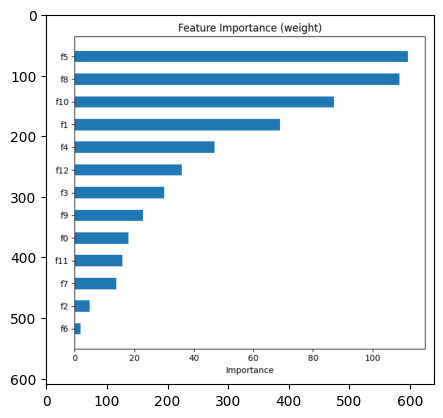

In [35]:
# Since the artifact is an image, we can display it in the following way:

import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread(file_path)
plt.imshow(image)
plt.show()

### d) Models

In [36]:
model_local_path = mlflow.artifacts.download_artifacts(run_id=last_run.info.run_id, artifact_path=artifact_path)

In [37]:
# load the model from the local path using MLflow

model = mlflow.sklearn.load_model(model_local_path)

In [38]:
# Skip the download path and directly reference the model from the run
model = mlflow.sklearn.load_model(f"runs:/{last_run.info.run_id}/{artifact_path}")